## Pre-trained Conv-nets

Here we will show how to use an existing model of convolutional neural networks that are built into keras.
<br>There are several architectures exist that were trained on larget datasets of images (such as imagenet) and you can refer to them here [Keras website](https://keras.io/applications/).
<br>For each model there is a different input size of the images (224x224),(299x299),.... Thus to predict an image using them, you will need to resize it.

In [9]:
#Loading the model.

import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array

input_shape=(150,150)
target_model='VGG16'

if(target_model=='VGG16'):
    #from tensorflow.keras.applications import VGG16
    from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions
    #First time calling this will download the entire model (~500MB)
    conv_net=VGG16()
    input_shape=(224,224)
elif (target_model=='InceptionV3'):
    #Inception model ~100MB
    from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
    conv_net=InceptionV3()
    input_shape=(299,299)
elif (target_model=='ResNet50'):
    #ResNet50 model ~215MB
    from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2,preprocess_input,decode_predictions
    conv_net=InceptionResNetV2()
    input_shape=(299,299)

conv_net.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
#Starting local webcamera.
#make sure to install OpenCV library

import cv2
import numpy as np
#start webcamera
cam = cv2.VideoCapture(0)


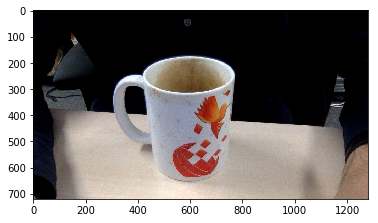

coffee_mug: 57.0%
pitcher: 13.0%
cup: 6.0%


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

#Read one image from the camera
ret, image = cam.read()
#display the image
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

#Resize the image to the acceptable size of the model
image=cv2.resize(image, input_shape)
#create a copy of the image
img=img_to_array(image.copy())
#pre-process the image (Normalization)
img=preprocess_input(img) 
#predict the image
res=conv_net.predict(np.array([img]))
#convert predictions to labels
predictions=decode_predictions(res)[0]

#print top 3 predictions with their confidence values
for i in range(3):
    print("{0}: {1}%".format(predictions[i][1],round(predictions[i][2]*100)))


In [6]:
cam.release()